# Proyecto 2: Ingeniería de features, Modelos avanzados e Interpretación de modelos.

**PARTE A - Transformación de Datos**

Elige cuáles de las siguientes tareas son apropiadas para su dataset. Justifica e implementa al menostres de las transformaciones de datos propuestas:

1- Detección y eliminación de Outliers

2- Encoding

3- Imputación de valores faltantes

4- Escalado de datos

5- Generación de nuevas variables predictoras/reducción de dimensionalidad (SVD/PCA).

Vuelve a entrenar el modelo implementado en la Entrega 01 - en particular, el árbol de decisión - y evalúa su desempeño a partir del dataset obtenido luego de transformar los datos. ¿Hay una mejora en su desempeño? Sea cual sea la respuesta, intenta explicar a qué se debe

In [1]:
#imporamos las librerias con las que vamos a trabajar en la parte A
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

In [2]:
proyecto = pd.read_csv('DS_Proyecto_01_Datos_Properati.csv') #importamos el dataset 
proyecto.head()

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta


In [3]:
proyecto.isna().sum()

start_date             0
end_date               0
created_on             0
lat                 9925
lon                 9959
l1                     0
l2                     0
l3                     0
rooms                  0
bedrooms               0
bathrooms           5957
surface_total      20527
surface_covered    21614
price                  0
currency               0
title                  0
description            0
property_type          0
operation_type         0
dtype: int64

In [4]:
proyecto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146660 entries, 0 to 146659
Data columns (total 19 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   start_date       146660 non-null  object 
 1   end_date         146660 non-null  object 
 2   created_on       146660 non-null  object 
 3   lat              136735 non-null  float64
 4   lon              136701 non-null  float64
 5   l1               146660 non-null  object 
 6   l2               146660 non-null  object 
 7   l3               146660 non-null  object 
 8   rooms            146660 non-null  float64
 9   bedrooms         146660 non-null  float64
 10  bathrooms        140703 non-null  float64
 11  surface_total    126133 non-null  float64
 12  surface_covered  125046 non-null  float64
 13  price            146660 non-null  float64
 14  currency         146660 non-null  object 
 15  title            146660 non-null  object 
 16  description      146660 non-null  obje

Para comenzar, voy realizar un filtro sobre propiedad, trabajando sólo con departamento, PH y casa de Capital Federal; la superficie total debe ser mayor a la cubierta y debe tener como máximo 5 baños. El valor máximo a tomar por propiedad es de hasta USD$400.000

In [5]:
nprop = proyecto.property_type.isin(['Departamento', 'Casa', 'PH'])
nsup=(proyecto['surface_total']>=proyecto['surface_covered'])
nprecio= proyecto['price']<=400000
ncap= proyecto['l2']=='Capital Federal'
nban= proyecto['bathrooms']<=5


proyecto=proyecto[nprop & nsup & nprecio & ncap & nban]
proyecto.shape



(70059, 19)

In [6]:
proyecto.isna().sum()

start_date            0
end_date              0
created_on            0
lat                3057
lon                3057
l1                    0
l2                    0
l3                    0
rooms                 0
bedrooms              0
bathrooms             0
surface_total         0
surface_covered       0
price                 0
currency              0
title                 0
description           0
property_type         0
operation_type        0
dtype: int64

* **Encoding**

Vamos a convertir las variables de Tipo de propiedad en numéricas y se van a añadir al DS

In [7]:
dummies= pd.get_dummies(proyecto['property_type'], prefix = 'property_type')
dummies

,property_type_Casa,property_type_Departamento,property_type_PH
0,0,1,0
1,0,0,1
2,0,0,1
3,0,0,1
5,0,0,1
...,...,...,...
146542,0,1,0
146543,0,1,0
146545,0,1,0
146549,0,0,1


In [8]:
concatenado_uno =pd.concat([proyecto,dummies], axis=1)
concatenado_uno

,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,...,surface_covered,price,currency,title,description,property_type,operation_type,property_type_Casa,property_type_Departamento,property_type_PH
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,...,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta,0,1,0
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,...,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta,0,0,1
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,...,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta,0,0,1
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,...,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta,0,0,1
5,2019-10-17,2019-11-01,2019-10-17,-34.593779,-58.441239,Argentina,Capital Federal,Villa Crespo,2.0,1.0,...,56.0,150000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Vil...,"Excelente ph solo 2 unidades, no paga expensas...",PH,Venta,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146542,2019-07-31,2020-01-17,2019-07-31,-34.578688,-58.435533,Argentina,Capital Federal,Palermo,2.0,1.0,...,80.0,170000.0,USD,A extrenar departamento en venta en Palermo,Simpático departamento a estrenar en Palermo H...,Departamento,Venta,0,1,0
146543,2019-07-31,2019-08-14,2019-07-31,-34.581699,-58.433547,Argentina,Capital Federal,Palermo,3.0,2.0,...,81.0,225000.0,USD,Duplex 2 dormitorios super luminoso y amplio !,Para visitarlo contactar a Marta Cell: 0116153...,Departamento,Venta,0,1,0
146545,2019-07-31,2019-09-04,2019-07-31,-34.581425,-58.442707,Argentina,Capital Federal,Palermo,3.0,2.0,...,82.0,399000.0,USD,Palermo Hollywood - 3 Amb c/ dependencia y coc...,"Exclusivo 3 ambientes c/depend., balcón al con...",Departamento,Venta,0,1,0
146549,2019-07-31,2019-10-12,2019-07-31,-34.576573,-58.434394,Argentina,Capital Federal,Palermo,3.0,2.0,...,84.0,178000.0,USD,Hermoso PH de 3 ambientes al frente muy lumisoso,Hermoso PH ubicado en el primer piso.al frente...,PH,Venta,0,0,1


Elimino las variables que considero no aportan demasiado al Dataset

In [9]:
proyecto_uno = concatenado_uno.drop(columns = ['start_date', 'end_date', 'lat', 'lon', 'currency','title', 'description', 'operation_type', 'l1', 'created_on', 'property_type', 'l2','l3'])
proyecto_uno

,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,property_type_Casa,property_type_Departamento,property_type_PH
0,7.0,7.0,2.0,140.0,140.0,153000.0,0,1,0
1,2.0,1.0,2.0,70.0,58.0,159000.0,0,0,1
2,2.0,1.0,1.0,45.0,45.0,125000.0,0,0,1
3,2.0,1.0,1.0,85.0,50.0,295000.0,0,0,1
5,2.0,1.0,1.0,56.0,56.0,150000.0,0,0,1
...,...,...,...,...,...,...,...,...,...
146542,2.0,1.0,1.0,80.0,80.0,170000.0,0,1,0
146543,3.0,2.0,2.0,85.0,81.0,225000.0,0,1,0
146545,3.0,2.0,2.0,88.0,82.0,399000.0,0,1,0
146549,3.0,2.0,1.0,84.0,84.0,178000.0,0,0,1


* **Detección de Outliers**

Para identificar los outliers de las distintas variables numéricas, graficaremos un boxplot para ver la distribución de cada una:

Las variables numéricas son:  

 bedrooms        
 
 bathrooms      
 
 surface_total   
 
 surface_covered  
 
 price          

Text(0.5, 1.0, 'Distribución de la variable Price:')

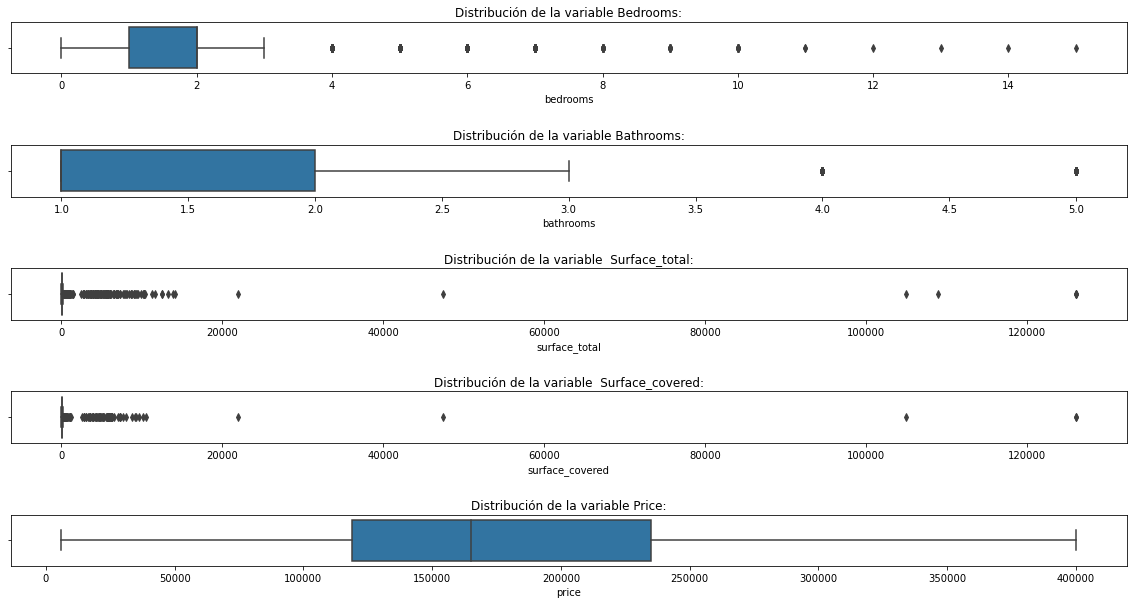

In [10]:
plt.figure(figsize =(20,10))

plt.subplot(9,1,1)

sns.boxplot(data= proyecto_uno, x='bedrooms')
plt.title('Distribución de la variable Bedrooms:')

plt.subplot(9,1,3)

sns.boxplot(data= proyecto_uno, x='bathrooms')
plt.title('Distribución de la variable Bathrooms:')

plt.subplot(9,1,5)

sns.boxplot(data= proyecto_uno, x='surface_total')
plt.title('Distribución de la variable  Surface_total:')

plt.subplot(9,1,7)

sns.boxplot(data= proyecto_uno, x='surface_covered')
plt.title('Distribución de la variable  Surface_covered:')

plt.subplot(9,1,9)

sns.boxplot(data= proyecto_uno, x='price')
plt.title('Distribución de la variable Price:')

Para quitar los outliers, voy a utilizar la regla de tres sigmas (en el proyecto anterior utilice rango intercuartilico)
Se van a eliminar los valores atípicos de precio, superficie total y superficie cubierta porque son los que se visualizan con mas outliers

In [11]:
from scipy.stats import zscore

zscore_precio = zscore(proyecto_uno['price'])
zscore_suptot = zscore(proyecto_uno['surface_total'])
zscore_supcub = zscore(proyecto_uno['surface_covered'])
filtro_zscore = (abs(zscore_precio)>3) |  (abs(zscore_suptot)>3) | (abs(zscore_supcub)>3)
proyecto_dos= proyecto_uno[~filtro_zscore]

In [12]:
proyecto_dos.shape

(69947, 9)

Volvemos a graficar para ver la nueva distribución

Text(0.5, 1.0, 'Distribución de la variable Price:')

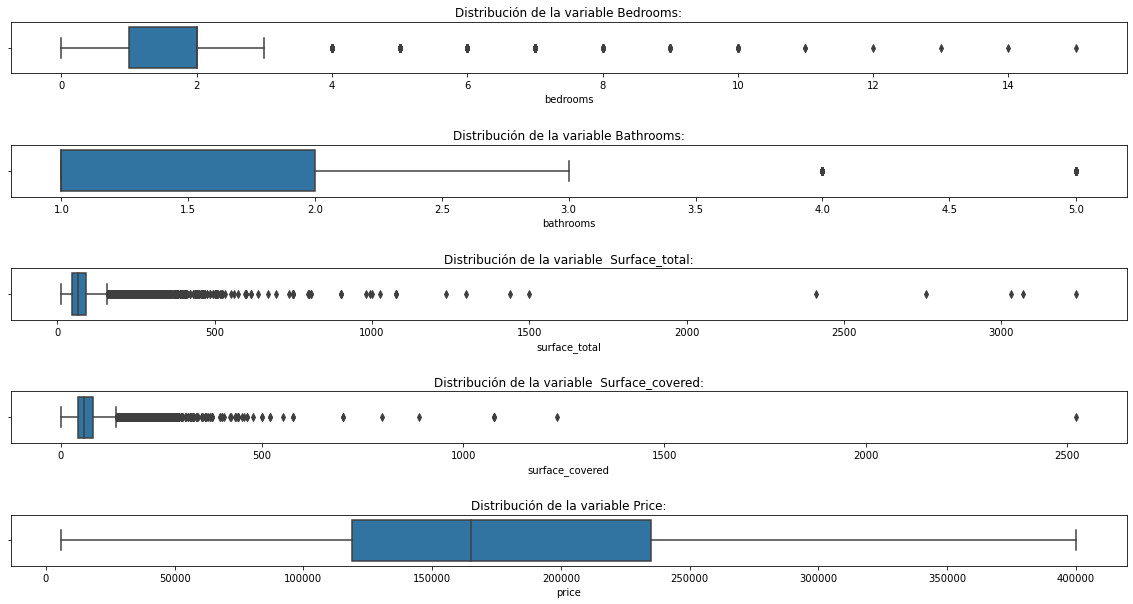

In [13]:
plt.figure(figsize =(20,10))

plt.subplot(9,1,1)

sns.boxplot(data= proyecto_dos, x='bedrooms')
plt.title('Distribución de la variable Bedrooms:')

plt.subplot(9,1,3)

sns.boxplot(data= proyecto_dos, x='bathrooms')
plt.title('Distribución de la variable Bathrooms:')

plt.subplot(9,1,5)

sns.boxplot(data= proyecto_dos, x='surface_total')
plt.title('Distribución de la variable  Surface_total:')

plt.subplot(9,1,7)

sns.boxplot(data= proyecto_dos, x='surface_covered')
plt.title('Distribución de la variable  Surface_covered:')

plt.subplot(9,1,9)

sns.boxplot(data= proyecto_dos, x='price')
plt.title('Distribución de la variable Price:')

* **Escalado de datos**

Definimos X e y y estandarizamos los datos

In [14]:
X = proyecto_dos[['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered', 'property_type_Casa', 'property_type_Departamento', 'property_type_PH']] 
y = proyecto_dos['price']

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scl = StandardScaler()
X_train_scaler = scl.fit_transform(X_train)
X_train_scaler

array([[ 0.18695917,  0.16741775,  1.04521618, ..., -0.13591919,
         0.41271085, -0.38210247],
       [ 0.18695917,  0.16741775,  1.04521618, ..., -0.13591919,
         0.41271085, -0.38210247],
       [ 0.18695917,  0.16741775, -0.59468742, ..., -0.13591919,
         0.41271085, -0.38210247],
       ...,
       [-0.70980699, -0.89305258,  1.04521618, ..., -0.13591919,
         0.41271085, -0.38210247],
       [ 1.08372532,  1.22788808, -0.59468742, ..., -0.13591919,
        -2.42300391,  2.61709905],
       [-1.60657315, -0.89305258, -0.59468742, ..., -0.13591919,
         0.41271085, -0.38210247]])

In [17]:
np.mean(X_train_scaler),np.std(X_train_scaler) #media y desviacion estandar

(4.2284384618209225e-17, 1.0)

In [18]:
X_train_scaler.shape

(55957, 8)

In [19]:
X_test_scaler = scl.transform(X_test)
X_test_scaler

array([[ 0.18695917,  0.16741775,  1.04521618, ..., -0.13591919,
         0.41271085, -0.38210247],
       [ 0.18695917,  0.16741775, -0.59468742, ..., -0.13591919,
         0.41271085, -0.38210247],
       [ 1.08372532,  1.22788808, -0.59468742, ..., -0.13591919,
         0.41271085, -0.38210247],
       ...,
       [ 1.08372532,  1.22788808,  1.04521618, ..., -0.13591919,
        -2.42300391,  2.61709905],
       [-0.70980699, -0.89305258, -0.59468742, ..., -0.13591919,
         0.41271085, -0.38210247],
       [ 0.18695917,  0.16741775,  2.68511978, ..., -0.13591919,
         0.41271085, -0.38210247]])

# Entrenando Arboles

Entrenamos nuevamente el Arbol de decision escalado y vamos a comparar su rendimiento en base al proyecto 1

In [20]:
X_train_dt = X_train_scaler
X_test_dt = X_test_scaler
y_train_dt =y_train
y_test_dt =y_test

tree = DecisionTreeRegressor(max_depth =3) #La profundidad del árbol es 3
tree.fit (X_train_dt,y_train_dt)

y_train_dt_pred = tree.predict(X_train_dt)
y_test_dt_pred =tree.predict(X_test_dt)

rmse_train_dt =np.sqrt(mean_squared_error(y_train_dt, y_train_dt_pred))
rmse_test_dt =np.sqrt(mean_squared_error(y_test_dt, y_test_dt_pred))
print(f'La raíz de error medio cuadrático en Train es:{rmse_train_dt} ')
print(f'La raíz de error medio cuadrático en Test es:{rmse_test_dt} ')

La raíz de error medio cuadrático en Train es:52024.0074955207 
La raíz de error medio cuadrático en Test es:51884.378233808966 


Comparando el resultado con el modelo anterior podemos ver que hay una gran disminucion en el RMSE tanto en Train como en Tes, por lo que el mismo mejoró

**PARTE B - Modelos Avanzados**

6- Elige dos de los modelos avanzados vistos (en el caso de regresión, considera una regresión lineal con atributos polinómicos y regularización). Entrénalos y evalúalos con sus argumentos por defecto. No te olvides de hacer un train/test split y usar Validación Cruzada.

7- Optimiza sus hiperparámetros mediante Validación Cruzada y Grid Search o Random Search.

8- Compara el desempeño de los nuevos modelos entre sí y con el modelo de la Parte A. ¿Cuál elegirías? Justifica.

Vamos a utilizar Random Forest, Lasso y Grid Search

Redefinimos nuevamente las variables


In [21]:

def entrena_modelo (X_train, X_test, y_train, y_test, modelo):
    
    #Entrenamos el modelo y predecimos y_train e y_test:
    modelo.fit(X_train, y_train)
    y_train_pred = modelo.predict(X_train)
    y_test_pred = modelo.predict(X_test)
    
    #Imprimimos las metricas consideradas para evaluar el modelo:
    rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
    rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
    r2 = modelo.score(X_test, y_test)
    print(f'Score de modelo: {r2}')
    print(f'Raiz del error cuadrático medio en Train: {rmse_train}')
    print(f'Raiz del error cuadrático medio en Test: {rmse_test}')
    
    #Graficamos la distribucion de errores:
    plt.figure(figsize = (15,6))
    plt.subplot(1,2,1)
    sns.distplot(y_train - y_train_pred, bins = 20, label = 'train')
    sns.distplot(y_test - y_test_pred, bins = 20, label = 'test')
    plt.xlabel('errores')
    plt.legend()

    ax = plt.subplot(1,2,2)
    plt.scatter(y_test,y_test_pred, s =2)    
    lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes]
    ]    
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.xlabel('y (test)')
    plt.ylabel('y_pred (test)')
    
    plt.tight_layout()
    plt.show()
    

    return rmse_train,rmse_test,r2

Trataremos de buscar los mejores hiperparámetros para entrenar el modelo, agregando también validación cruzada con 5 pliegues y evaluaremos su performance:

* **GridSearch**

In [22]:
n_estimators = [100,250,500]
max_depth = [10,15,30]


grid= {'n_estimators': n_estimators,
               'max_depth': max_depth,}

In [23]:
modelo5 = GridSearchCV(RandomForestRegressor(random_state = 42),param_grid = grid, n_jobs = -1, cv = 3)

Score de modelo: 0.7680901102277771
Raiz del error cuadrático medio en Train: 30814.74248179693
Raiz del error cuadrático medio en Test: 39727.57570764538


C:\Users\Juli\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juli\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


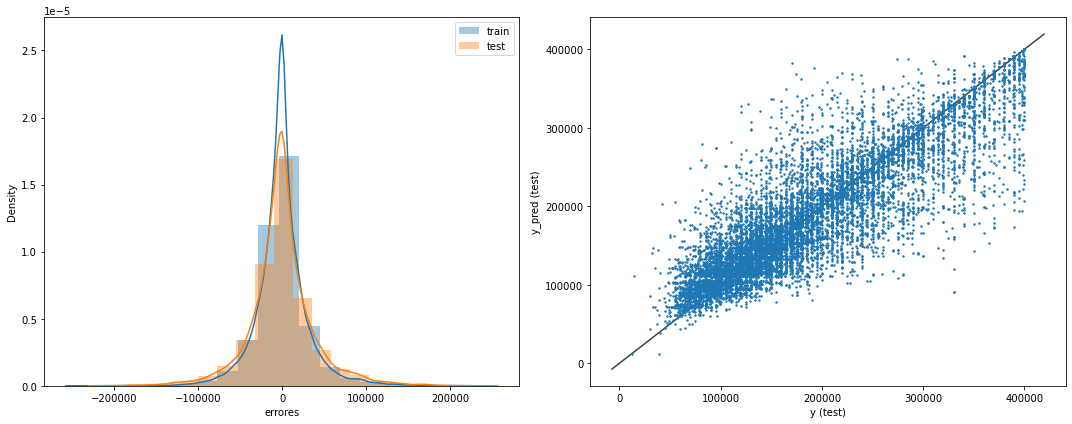

In [24]:
rmse_train_5,rmse_test_5,score5 = entrena_modelo(X_train, X_test, y_train, y_test, modelo5)

In [25]:
best_params =  modelo5.best_params_
print (f'Los mejores parametros son: {best_params}')

Los mejores parametros son: {'max_depth': 30, 'n_estimators': 500}


* **Ridge con polynomial features**

In [26]:
poly = PolynomialFeatures(degree = 3, include_bias=False) 
X_train_new = poly.fit_transform(X_train_scaler)
X_test_new = poly.transform(X_test_scaler)


In [27]:
X_train_new

array([[  0.18695917,   0.16741775,   1.04521618, ...,  -0.06508361,
          0.06025673,  -0.05578784],
       [  0.18695917,   0.16741775,   1.04521618, ...,  -0.06508361,
          0.06025673,  -0.05578784],
       [  0.18695917,   0.16741775,  -0.59468742, ...,  -0.06508361,
          0.06025673,  -0.05578784],
       ...,
       [ -0.70980699,  -0.89305258,   1.04521618, ...,  -0.06508361,
          0.06025673,  -0.05578784],
       [  1.08372532,   1.22788808,  -0.59468742, ...,  15.3648523 ,
        -16.59565645,  17.92505438],
       [ -1.60657315,  -0.89305258,  -0.59468742, ...,  -0.06508361,
          0.06025673,  -0.05578784]])

In [28]:
grid= {'alpha': [0.01],
       'fit_intercept' : [True]}

In [29]:
modelo6 = GridSearchCV(Ridge(random_state=42),param_grid = grid, n_jobs = -1, cv = 3)

Score de modelo: -60.05629009978467
Raiz del error cuadrático medio en Train: 48196.96755847557
Raiz del error cuadrático medio en Test: 644610.8857409329


C:\Users\Juli\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juli\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


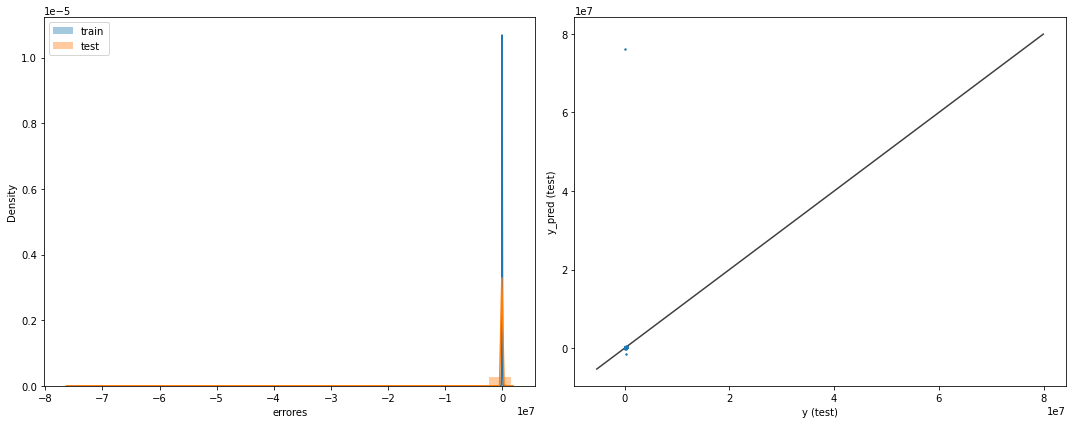

In [30]:
rmse_train_6,rmse_test_6,score6 = entrena_modelo(X_train_new, X_test_new, y_train, y_test, modelo6)

Grafica con los datos escalados

Score de modelo: 0.4233154686274162
Raiz del error cuadrático medio en Train: 55848.98511144051
Raiz del error cuadrático medio en Test: 62647.187780061744


C:\Users\Juli\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Juli\miniconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


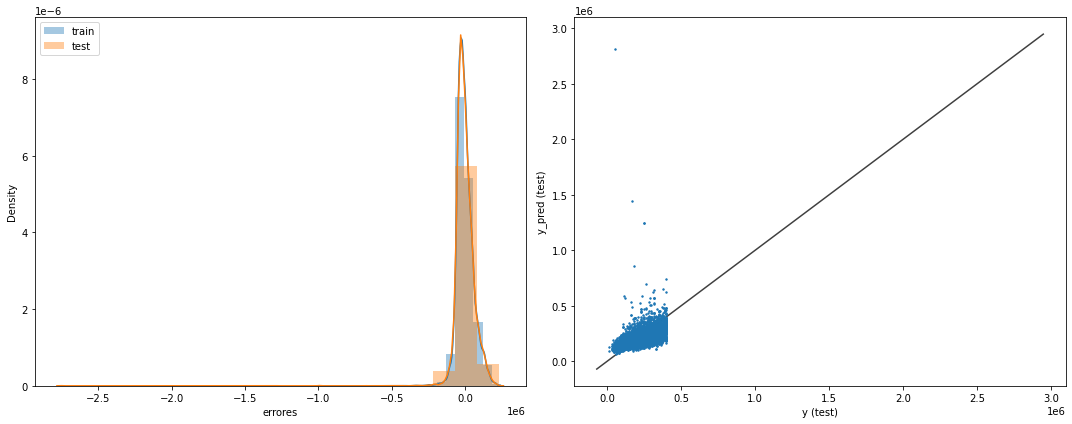

In [98]:
rmse_train_6,rmse_test_6,score6 = entrena_modelo(X_train_scaler, X_test_scaler, y_train, y_test, modelo6)

**Features importances**

In [99]:
modelo5.best_estimator_.feature_importances_

array([0.02312405, 0.02347048, 0.04742426, 0.47397342, 0.40658024,
       0.00159058, 0.01608017, 0.0077568 ])

In [100]:
 X_train.columns

Index(['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'surface_covered',
       'property_type_Casa', 'property_type_Departamento', 'property_type_PH'],
      dtype='object')

In [103]:
modelo6.best_estimator_.coef_

array([14280.72468368, -5328.61408419, 22644.52607273,  5179.39794606,
       36044.23079178, -5358.58405053,  5502.25694596, -3674.67870653])

**PARTE C - Interpretación de modelos**


¿Qué variables fueron relevantes para el modelo para hacer una predicción? 

Analizando el proyecto y las variables utilizadas, considero que las mas importantes para el mismo son baños,superficie total y superficie cubierta. 
Se nota que los errores están más dispersos mientras mayor es el precio que deben predecir


En comparación al proyecto 1, en donde RMSE dio un resultado de 113.429 para Train y 148.267 para Test, creo que el modelo con el nuevo análisis y el escalado de datos mejoró considerablemente.

Al momento de realizar los modelos avanzados, esperaba que Random forest y grid search tuvieran una mejor perfomance que el árbol de decision con los datos estandarizados.

Al utilizar polynomial features, el resultado de Ridge da bastante mal y tiende al overfitting. Esperaba que fuera mucho mejor.

Como acción futura me propondría tratar de mejorar la performance de polynomial features. 